In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
data = np.loadtxt('./iris.csv', delimiter=',', skiprows=1, dtype=str)
x = data[:, :-1].astype(float)

print(x.shape)

(150, 4)


In [89]:
def kmeans(x, k, iterations=100):
    centroids = x[np.random.choice(len(x), k, replace=False)]

    for _ in range(iterations):
        labels = []
        for point in x:
            distances = [np.sum((point-centroid)**2) for centroid in centroids]
            labels.append(np.argmin(distances))
        labels = np.array(labels)


        new_centroids = []
        for i in range(k):
            cluster_points = x[labels == i]
            if (len(cluster_points) > 0):
                new_centroids.append(np.mean(cluster_points, axis=0))
            else:
                new_centroids.append(centroids[i])
            
        new_centroids = np.array(new_centroids)

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids



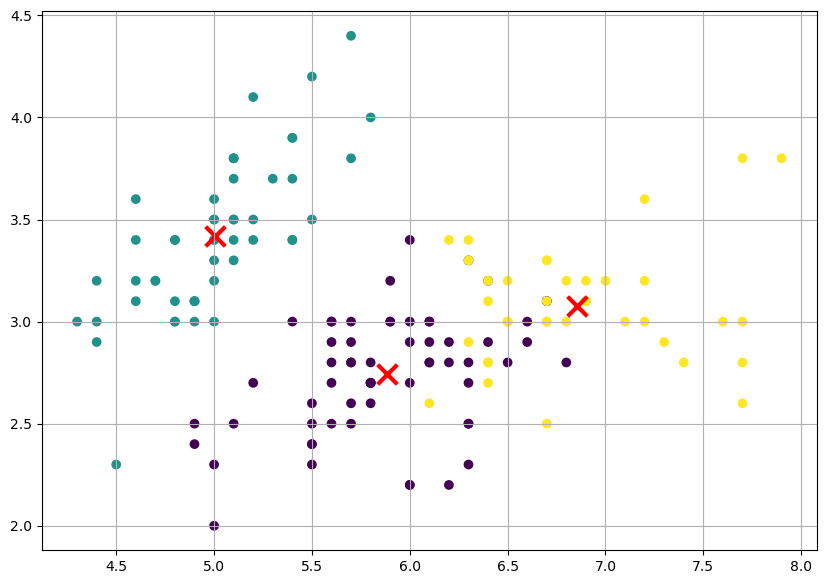

In [106]:
labels, centroids = kmeans(x, 3)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.grid(True)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.show()

In [101]:
def cal_wcss(x, labels, centroids):
    wcss = 0

    for i, point in enumerate(x):
        centroid = centroids[labels[i]]
        wcss += np.sum((point-centroid)**2)
    return wcss

In [102]:
max_k = 10
wcss = []

for i in range(1, max_k+1):
    labels, centroids = kmeans(x, i)
    wcss.append(cal_wcss(x, labels, centroids))


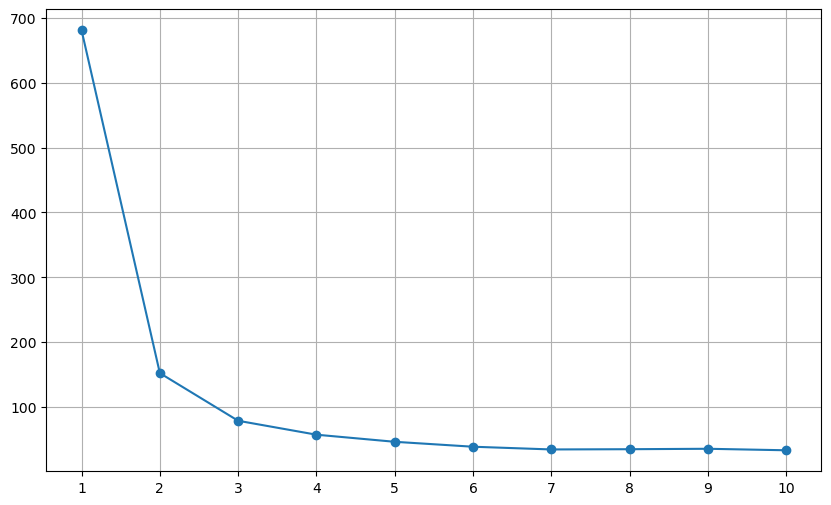

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k+1), wcss, marker='o')
plt.xticks(range(1, max_k+1))
plt.grid(True)
plt.show()